In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    from visualize import show_single_molecule
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

# feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\feather_files'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal'
feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

# Define dictionary of answers
answers_dict = {
    "Ring Vibration atoms": "9",
    "Strech Vibration atoms": "1,2 4,5",
    "Bending Vibration atoms": "22,23",
    "Dipole atoms": "11,6 4 10,11,12 11,12 5 4,5,1 4,3,2",
    "NPA manipulation atoms": "11,6 4 10,11,12 11,12,5 4,5,1 4,3,2",
    "Sub-Atoms": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25",
    "Charge values": "1,3,5,11,8,12,14",
    "Charge difference": "11,5 3,5 11,12 12,5",
    "Sterimol atoms": "4,6 6,4 4,3 11,6",
    "Bond length": "11,12 6,4 12,13 12,5 12,14 4,3",
    "Bond Angle": "11,6 4,6 4,5 1,5,4,3 11,6,4,5"
}

list_answers = [
    [9], [1600], [], [1200], [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 3, 5, 11, 8, 12, 14],
    [[11, 5], [3, 5], [11, 12], [12, 5]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12], [6, 4], [12, 13], [12, 5], [12, 14], [4, 3]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]

]


Molecules Loaded: ['B_1.feather', 'B_12.feather', 'B_13.feather', 'B_2.feather', 'B_4.feather', 'B_5_2.feather', 'B_5_3.feather', 'B_6.feather', 'B_7.feather', 'B_7_2.feather', 'B_7_3.feather', 'CF3_N2.feather', 'L16.feather', 'L16_2.feather', 'L16_3.feather', 'L17.feather', 'L17_2.feather', 'L17_3.feather', 'L18.feather', 'L18_2.feather', 'L18_3.feather', 'L19.feather', 'L19_2.feather', 'L19_3.feather', 'L20.feather', 'L20b.feather', 'L20_2.feather', 'L20_2b.feather', 'L20_3.feather', 'L21.feather', 'L21_2.feather', 'L21_3.feather', 'L22.feather', 'L22b.feather', 'L22_2.feather', 'L22_2b.feather', 'L22_3.feather', 'L23.feather', 'L23b.feather', 'L23_2.feather', 'L23_2b.feather', 'L23_3.feather', 'L24.feather', 'L24b.feather', 'L24_2.feather', 'L24_2b.feather', 'L24_3.feather', 'L25.feather', 'L25_2.feather', 'L25_3.feather', 'L28.feather', 'L29.feather', 'L_10.feather', 'L_13.feather', 'L_26.feather', 'L_27.feather', 'L_28_full.feather', 'L_4.feather', 'L_4_full.feather', 'L_5.feather

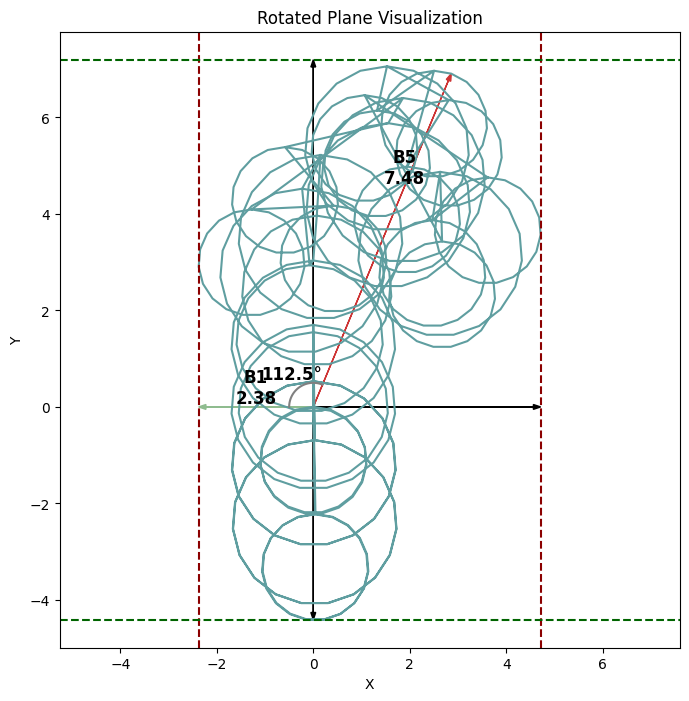

In [4]:
sterimol=mols.molecules[0].get_sterimol([11,6],visualize=True)

In [16]:
df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df

None
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9, 8, 7, 6, 11, 10]
Second atom is NOT in the benzene ring.
Benzene ring found: [9,

,cross,cross_angle,para,para_angle,Frequency_Bending_22-23,Cross_mag_Bending_22-23,dip_x_NPA_11-6-4,dip_y_NPA_11-6-4,dip_z_NPA_11-6-4,total_dipole_NPA_11-6-4,dip_x_NPA_10-11-12,dip_y_NPA_10-11-12,dip_z_NPA_10-11-12,total_dipole_NPA_10-11-12,dip_x_NPA_11-12-5,dip_y_NPA_11-12-5,dip_z_NPA_11-12-5,total_dipole_NPA_11-12-5,dip_x_NPA_4-5-1,dip_y_NPA_4-5-1,dip_z_NPA_4-5-1,total_dipole_NPA_4-5-1,dip_x_NPA_4-3-2,dip_y_NPA_4-3-2,dip_z_NPA_4-3-2,total_dipole_NPA_4-3-2,dipole_x_11-6-4,dipole_y_11-6-4,dipole_z_11-6-4,total_dipole_11-6-4,dipole_x_10-11-12,dipole_y_10-11-12,dipole_z_10-11-12,total_dipole_10-11-12,dipole_x_11-12-5,dipole_y_11-12-5,dipole_z_11-12-5,total_dipole_11-12-5,dipole_x_4-5-1,dipole_y_4-5-1,dipole_z_4-5-1,total_dipole_4-5-1,dipole_x_4-3-2,dipole_y_4-3-2,dipole_z_4-3-2,total_dipole_4-3-2,nbo_atom_1,nbo_atom_3,nbo_atom_5,nbo_atom_11,nbo_atom_8,nbo_atom_12,nbo_atom_14,hirshfeld_atom_1,hirshfeld_atom_3,hirshfeld_atom_5,hirshfeld_atom_11,hirshfeld_atom_8,hirshfeld_atom_12,hirshfeld_atom_14,cm5_atom_1,cm5_atom_3,cm5_atom_5,cm5_atom_11,cm5_atom_8,cm5_atom_12,cm5_atom_14,bond_length_11-12,bond_length_6-4,bond_length_12-13,bond_length_12-5,bond_length_12-14,bond_length_4-3,"angle_[11, 6, 4]","angle_[6, 4, 5]","dihedral_[1, 5, 4, 3]","dihedral_[11, 6, 4, 5]"
LS1621,1694.9017,35.316816,1674.2398,57.610993,3185.8891,0.362796,1.223292,4.541295,-0.325570,4.714425,-3.416760,3.091347,-0.075262,4.608290,4.641783,-0.813357,-0.136359,4.714477,4.799053,-1.309973,0.220203,4.979501,1.022040,4.822835,-0.700936,4.979519,-7.532050,7.169987,-1.220449,10.4704,-9.967899,-3.184249,-0.362681,10.4704,3.385767,-9.905708,0.208606,10.4704,2.215657,-10.088074,1.718023,10.4704,-8.074403,6.615014,-0.821949,10.4704,-0.07004,-0.57181,-0.55467,-0.48212,-0.17474,0.42999,-0.74880,0.030151,-0.137511,-0.110300,-0.054912,-0.002840,0.153997,-0.138751,0.028974,-0.214169,-0.355834,-0.311862,-0.055124,0.385557,-0.332490,2.187181,1.477771,2.331842,2.278693,1.971962,1.336628,115.292603,122.984941,4.080349,3.909772
LS1622,1711.9390,8.450715,1678.6439,83.555294,1504.5855,0.372515,1.198192,2.464352,-0.940683,2.897167,-1.657098,3.578817,-0.827747,4.029773,2.810476,-0.015444,0.703274,2.897172,0.330818,-0.319532,0.949992,1.055475,-0.279649,0.384352,-0.942333,1.055425,-5.004703,8.336972,-1.251520,9.8041,-9.786091,-0.386809,-0.448617,9.8041,5.500055,-8.113340,0.203860,9.8041,4.521571,-8.551570,1.595148,9.8041,-5.624766,7.941909,-1.185976,9.8041,-0.07047,-0.57130,-0.54765,-0.47562,-0.15488,0.42660,-0.74578,0.030881,-0.136765,-0.107270,-0.050264,0.000889,0.154321,-0.135874,0.029608,-0.213451,-0.352109,-0.306852,-0.047315,0.385280,-0.329716,2.189505,1.478193,2.327676,2.283270,1.971268,1.335608,115.318733,122.924372,3.980272,3.953466
LS1630,1663.6344,29.805592,1703.9865,60.675211,3184.5253,0.359482,2.620562,4.939031,-0.232814,5.596032,-3.157611,3.986830,-0.008025,5.085802,5.585266,0.264586,-0.225544,5.596077,6.711991,-0.302733,-0.001835,6.718815,2.814280,6.042628,-0.842029,6.718820,-7.855863,9.055730,-1.189672,12.0472,-11.731626,-2.733594,-0.180422,12.0472,4.891928,-11.009296,-0.023950,12.0472,3.644420,-11.357375,1.692448,12.0472,-8.525685,8.470069,-0.840699,12.0472,-0.07003,-0.57500,-0.55173,-0.50856,0.39412,0.42905,-0.74744,0.030224,-0.138898,-0.109227,-0.070256,0.107275,0.151947,-0.138777,0.029075,-0.215925,-0.354211,-0.326893,0.127587,0.382910,-0.332536,2.185362,1.479088,2.334012,2.283494,1.971375,1.337889,115.257800,122.991934,4.017537,3.825489
LS1641,1668.3534,31.791145,1704.3969,57.074072,3183.2433,0.382349,1.076529,1.098246,-2.540128,2.969396,-1.032936,-0.363189,-2.492431,2.722329,1.971763,0.040352,2.219921,2.969432,4.373967,0.656140,2.496815,5.078996,2.195757,3.456588,-3.004438,5.078976,-9.513054,4.706455,-2.646686,10.9386,-8.855049,-6.419272,-0.186865,10.9386,1.023949,-10.890562,0.032429,10.9386,-1.005550,-10.300880,3.540423,10.9386,-10.020232,3.820975,-2.156143,10.9386,-0.07503,-0.57088,-0.56039,-0.52981,0.40223,0.44021,-0.74740,0.027834,-0.136965,-0.108225,-0.090239,0.

In [17]:
df.to_csv(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\compset_charges.csv',index=False)

Table has been created successfully at location: results.db 
Created flag: True
linear model selected
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (33, 3), y shape: (33,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (33,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                   Estimate  Std. Error    t value       p value
(Intercept)        0.999064    0.063971  15.617516  1.110223e-15
B1_B5_angle_4-3   -0.262183    0.081418  -3.220195  3.151414e-03
L_11-6             0.446147    0.089535   4.982920  2.659967e-05
bond_length_11-12  0.706242    0.073954   9.549742  1.857310e-10
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.7406129578373138, MAE: 0.2836230214503464, RMSD: 0.39949711166109275
Calculating cross-validation metrics for 5-fold CV...
5-fold CV 

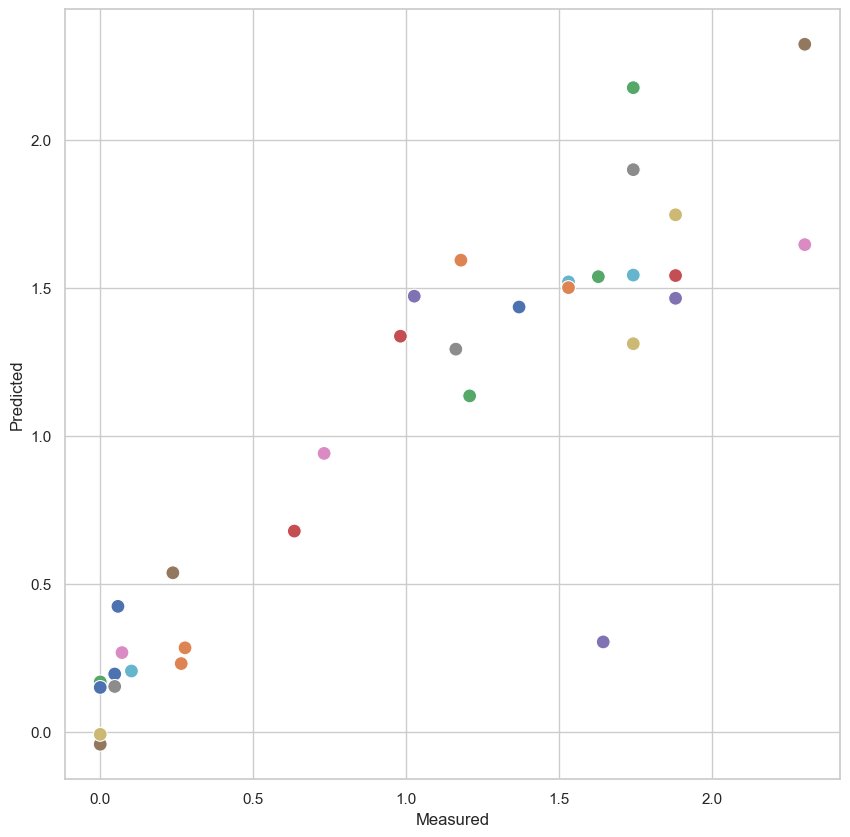

In [3]:
csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\comp_set_app1.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
features_combination=['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12']
plot.generate_and_display_q2_scatter_plot(Regression_model,features_combination)
# fit_and_evaluate_single_combination_regression(Regression_model,['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12'],r2_threshold=0,bool_parallel=False)

In [ ]:
#!/gpfs0/gaus/users/edenspec/.conda/envs/working_env/bin/python

import numpy as np
import os
import argparse
import shutil
import sys

# Define file extensions as constants (if needed elsewhere in the script)
SMI = '.smi'
XYZ = '.xyz'
CSV = '.csv'
ZIP = '.zip'
PPT = '.ppt'
CIF = '.cif'
MOL = '.mol'
PDB = '.pdb'

# Define Linux commands and paths as constants
COPY_CMD = 'cp'
OBABEL_PREFIX = '/gpfs0/gaus/users/itamarwa/transfer_to_itamar/build/bin/obabel '
OBABEL_XYZ_SETTINGS_1 = ' -O '
OBABEL_XYZ_SETTINGS_2 = ' --gen3d'
XTB_INPUT_PREFIX = '/gpfs0/gaus/projects/xtb-6.4.1/bin/xtb --input '  # xtb_di.inp 
XTB_PREFIX = '/gpfs0/gaus/projects/xtb-6.4.1/bin/xtb '
XTB_SUFFIX = ' --ohess --dipole --pop'
CREST_INPUT_PREFIX = '/gpfs0/gaus/projects/crest --input '
CREST_PREFIX = '/gpfs0/gaus/projects/crest '	
GAUSS_SUFFIX = '/gpfs0/gaus/users/kozuch/home/scripts/gaussian/g16'    
#GAUSS_SUFFIX = '/gpfs0/gaus/users/edenspec/g16'

def submit_to_gaussian_calculation(path, queues=['64','66','67']):
    """
    Submits Gaussian calculations for all .com files in the specified directory.
    Runs the calculations directly in the main directory instead of subdirectories.

    Parameters:
    - path (str): The directory path containing .com files.
    - queue (str): The queue name for job submission. Default is 'm'.
    """
    # Verify the specified directory exists
    if not os.path.isdir(path):
        print(f"Error: The directory '{path}' does not exist or is not a directory.")
        return

    print(f"Processing directory: {path}")

    # List all .com files in the specified directory
    com_files = [file for file in os.listdir(path) if file.endswith('.com')]
    print(f"Found {len(com_files)} .com files in the directory.")
    os.chdir(path)
    if not com_files:
        print("No .com files found in the directory.")
        return

    for idx, com_file in enumerate(com_files):
        queue = queues[idx % len(queues)]  # Assign each file to a different queue in order
        src_com_path = os.path.join(path, com_file)
        output_name = com_file.replace('.com', '.log')
        gaussian_command = f"./g16 {com_file} {output_name} -q {queue}"
        print(f"Submitting Gaussian job: {gaussian_command}")

        try:
            submission_status = os.system(gaussian_command)
            if submission_status == 0:
                print(f"Successfully submitted job for '{com_file}' on queue {queue}.")
            else:
                print(f"Error submitting job for '{com_file}' on queue {queue}.")
        except Exception as e:
            print(f"Exception occurred while submitting job for '{com_file}': {e}")

    print("\nAll Gaussian calculations have been submitted.")

def main():
    """
    Parses command-line arguments and initiates the Gaussian calculation submission.
    """
    parser = argparse.ArgumentParser(description='Submit Gaussian calculations for .com files in a specified directory.')
    parser.add_argument('path', type=str, help='Path to the directory containing .com files.')
    parser.add_argument('-q', '--queue', type=str, default='m', help='Queue name for job submission (default: m).')
    args = parser.parse_args()

    # Validate that the provided path is absolute or relative
    if not os.path.exists(args.path):
        print(f"Error: The specified path '{args.path}' does not exist.")
        sys.exit(1)

    submit_to_gaussian_calculation(args.path)

if __name__ == '__main__':
    main()


In [7]:
df= mols.molecules[0].xyz_df
show_single_molecule(1,df)
ts=data_extractor.preform_coordination_transformation(df,[2,3,4])
show_single_molecule(1,ts)

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.44, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.27, frozenset({5, 6}): 1.39, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.39, frozenset({8, 9}): 1.4, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.19, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({28, 29}): 1.1, frozenset({29, 30}): 1.1, frozenset({3, 5}): 1.48, frozenset({11, 13}): 1.97, frozenset({13, 15}): 1.1, frozenset({25, 27}): 1.1, frozenset({16, 13}): 1.1, frozenset({26, 29}): 1.1, frozenset({34, 31}): 1.1, frozenset({0, 4}): 1.46, frozenset({35, 31}): 1.1, frozenset({10, 5}): 1.35, frozenset({24, 29}): 1.53, frozenset({36, 31}): 1.1, frozenset({11, 4}): 2.28, frozenset({24, 31}): 1.53, frozenset({32, 25}): 1.1, frozenset({25, 33}): 1.1, frozenset({17, 6}): 1.09, frozenset({18, 7}): 1.09, frozenset({8, 19}): 1.09, frozenset({9, 20}): 1.09, frozenset({24, 0}): 1.55, frozenset({0, 23}): 1.1, frozenset({1, 22}): 1.1, frozenset({1, 21}

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.44, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.27, frozenset({5, 6}): 1.39, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.39, frozenset({8, 9}): 1.4, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.19, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({28, 29}): 1.1, frozenset({29, 30}): 1.1, frozenset({3, 5}): 1.48, frozenset({11, 13}): 1.97, frozenset({13, 15}): 1.1, frozenset({25, 27}): 1.1, frozenset({16, 13}): 1.1, frozenset({26, 29}): 1.1, frozenset({34, 31}): 1.1, frozenset({0, 4}): 1.46, frozenset({35, 31}): 1.1, frozenset({10, 5}): 1.35, frozenset({24, 29}): 1.53, frozenset({36, 31}): 1.1, frozenset({11, 4}): 2.28, frozenset({24, 31}): 1.53, frozenset({32, 25}): 1.1, frozenset({25, 33}): 1.1, frozenset({17, 6}): 1.09, frozenset({18, 7}): 1.09, frozenset({8, 19}): 1.09, frozenset({9, 20}): 1.09, frozenset({24, 0}): 1.55, frozenset({0, 23}): 1.1, frozenset({1, 22}): 1.1, frozenset({1, 21}

Table has been created successfully at location: results.db 
Created flag: True
linear model selected
Using 1 jobs for evaluation. found 20 cores


Calculating combos with threshold 0.85 (single-core): 100%|██████████| 4960/4960 [01:05<00:00, 76.24it/s] 


| formula                                                                      |       R.sq |        Q.sq |         MAE |   Model_id |
|:-----------------------------------------------------------------------------|-----------:|------------:|------------:|-----------:|
| ('Amplitude_Stretch_4_10', 'dipole_y_5-6-1', 'B5_7-1')                       | 0.883555   |    0.796733 |    0.174936 |          0 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'loc_B5_10-4')                          | 0.867961   |    0.75474  |    0.174111 |          1 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'B5_10-4')                              | 0.854997   |    0.753533 |    0.176433 |          2 |
| ('Frequency_Stretch_4_10', 'diff_13-6_charge', 'B1_B5_angle_7-1')            | 0.857649   |    0.739539 |    0.196766 |          3 |
| ('Amplitude_Stretch_4_10', 'dipole_y_5-4-3', 'B1_10-4')                      | 0.546307   | -inf        | -inf        |       2483 |
| ('dipole_z_5-6-1', 'dipole_y_11-10-4', 'L_7-1')      

ValueError: shapes (1000,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

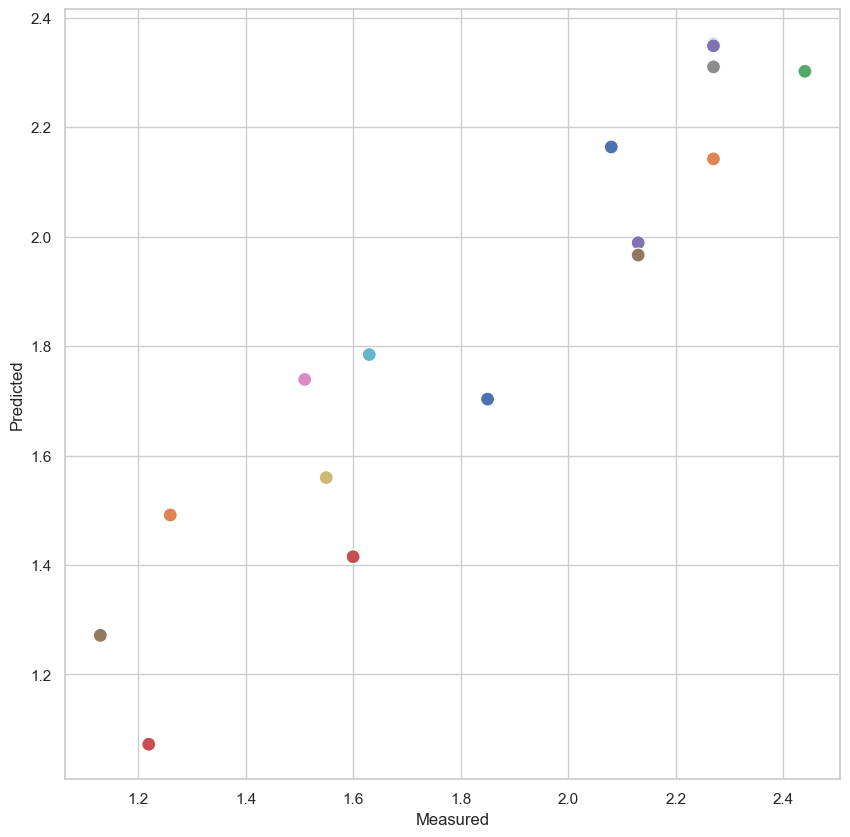

In [3]:
csv_path=   r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal\output2.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
results=Regression_model.fit_and_evaluate_combinations(top_n=None)

Table has been created successfully at location: results.db 
Created flag: True
linear model selected
Using 1 jobs for evaluation. found 20 cores


Calculating combos with threshold 0.85 (single-core): 100%|██████████| 969/969 [00:06<00:00, 142.84it/s]


| formula                                |       R.sq |        Q.sq |         MAE |   Model_id |
|:---------------------------------------|-----------:|------------:|------------:|-----------:|
| ('B5', 'L ', 'd-y (μL)')               | 0.921736   |    0.881881 |    0.13007  |          0 |
| ('B5', 'L*B5', 'd-y (μL)')             | 0.922935   |    0.873516 |    0.1374   |          1 |
| ('B5', 'd-y (μL)', 'HNBO ')            | 0.903085   |    0.853724 |    0.13721  |          2 |
| ('B5', 'd-y (μL)', 'CNBO ')            | 0.89689    |    0.847838 |    0.142358 |          3 |
| ('B5', 'd-y (μL)', 'intC=O')           | 0.90092    |    0.846227 |    0.146004 |          4 |
| ('L ', 'L*B5', 'd-y (μL)')             | 0.918455   |    0.841395 |    0.148127 |          5 |
| ('B5', 'd-y (μL)')                     | 0.883396   |    0.836644 |    0.147948 |          6 |
| ('B5', 'd-y (μL)', 'd-z')              | 0.883396   |    0.836644 |    0.147948 |          7 |
| ('B5', 'd-total', 'd-y (μL)'

ValueError: shapes (1000,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

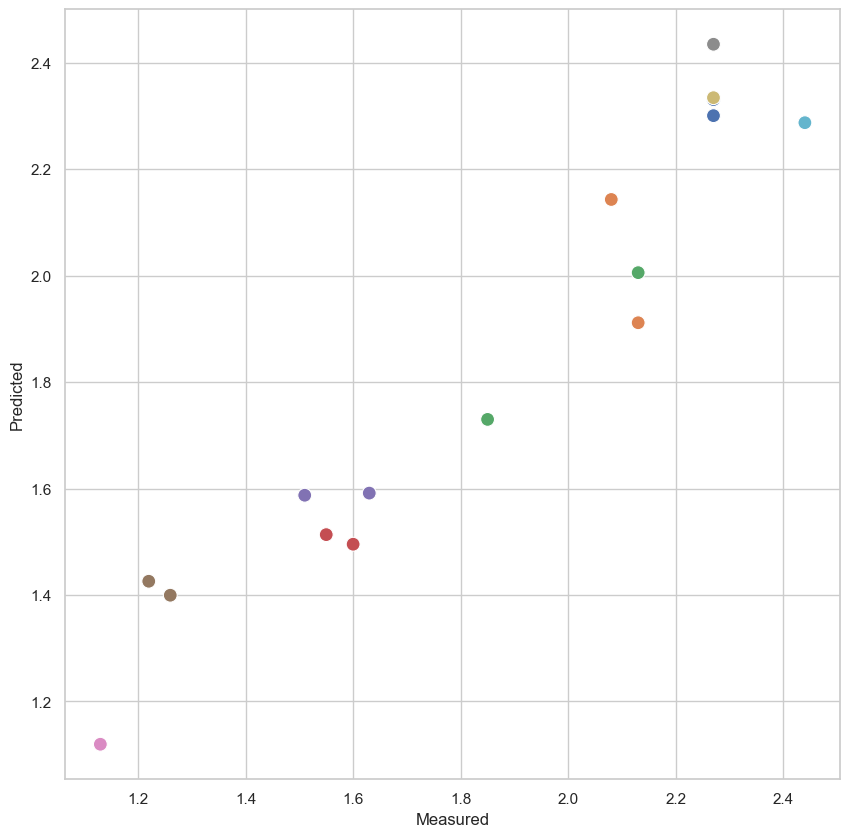

In [3]:
csv_path=   r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal\output_bench.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
results=Regression_model.fit_and_evaluate_combinations(top_n=None)

In [6]:
import re
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_substrate')
# The provided text (as a multi-line string)
xyz_text = """C -2.68135 -3.44770 1.18534
C -1.44899 -3.11794 1.75005
C -0.80258 -1.97274 1.30932
C -2.51866 -1.46759 -0.18651
C -3.21362 -2.61116 0.21057
H -3.21853 -4.33781 1.49528
H -0.98665 -3.73186 2.51460
H -2.91715 -0.79428 -0.93907
C 0.47880 -1.52871 1.83236
C 2.27343 -0.25836 2.32625
C 2.38601 -1.62105 3.04784
H 3.14826 -0.08239 1.68773
H 3.14454 -2.28037 2.61895
H 2.51118 -1.55453 4.12850
N 1.07469 -0.44682 1.44261
O 1.06890 -2.26350 2.80236
N -1.32893 -1.15905 0.35155
C 2.10870 0.95686 3.27246
C 1.91104 2.21756 2.42614
H 0.97633 2.14788 1.85504
H 2.75035 2.36391 1.72814
H 1.85615 3.10208 3.07393
C 0.90504 0.78935 4.20614
H -0.03488 0.72994 3.64126
H 0.98563 -0.09986 4.84444
H 0.83422 1.65887 4.87121
C 3.40103 1.10586 4.08800
H 3.33690 1.99926 4.72095
H 4.27409 1.22221 3.43107
H 3.58143 0.25178 4.75295
C -4.53426 -2.87569 -0.42861
F -4.42380 -2.84897 -1.79972
F -5.45064 -1.91214 -0.08371
F -5.04203 -4.09371 -0.06670
C 1.24056 -3.68383 -0.86125
C 2.42771 -3.29642 -0.23748
C 3.05922 -2.10371 -0.59652
C 2.52867 -1.26608 -1.58978
C 1.34346 -1.68599 -2.22322
C 0.70535 -2.87538 -1.86441
H 0.76149 -4.62235 -0.59578
H 2.87909 -3.94123 0.51293
H 3.99534 -1.84379 -0.10881
H 0.92547 -1.10131 -3.03971
H -0.20051 -3.17602 -2.38590
Pd -0.00055 0.32176 -0.36747
C 3.25457 -0.00545 -2.06260
C 2.27493 1.15073 -2.38046
H 2.88903 1.96506 -2.80412
C 4.27929 0.51205 -1.04552
H 5.09027 -0.20061 -0.86468
H 4.74007 1.43365 -1.42501
H 3.80815 0.74133 -0.07960
C 3.97869 -0.32880 -3.40490
H 3.21025 -0.55763 -4.15995
H 4.48238 0.59152 -3.74073
C 4.98348 -1.47341 -3.35288
H 4.50698 -2.41479 -3.05416
H 5.43044 -1.62821 -4.34064
C 1.46762 1.75809 -1.25390
H 2.01037 2.13105 -0.38284
C 0.21416 2.28163 -1.56174
H -1.02916 0.60353 -1.48753
H -0.19841 2.10876 -2.55407
C -2.62251 4.31917 -0.19184
N -0.46640 3.30189 -0.85492
C 0.29293 4.28419 -0.05665
C -1.83532 3.27249 -0.97183
O -2.43770 2.42055 -1.63806
H 5.80614 -1.27205 -2.65570
H 1.59249 0.85344 -3.18974
H 1.28015 4.39856 -0.50878
H -0.20627 5.25228 -0.08637
H 0.39547 3.96683 0.98378
F -3.95179 4.10309 -0.30058
F -2.28544 4.27418 1.14602
F -2.35021 5.59086 -0.64521"""

# Split the text into lines
lines = xyz_text.splitlines()

# Function to check if a line is a valid coordinate line (element symbol + three floats)
def is_coordinate_line(line):
    parts = line.split()
    if len(parts) != 4:
        return False
    # Try converting the last three tokens to float
    try:
        float(parts[1])
        float(parts[2])
        float(parts[3])
        return True
    except ValueError:
        return False

# Extract valid coordinate lines
coord_lines = [line for line in lines if is_coordinate_line(line)]
num_atoms = len(coord_lines)

# Choose a comment line.
# For this example we use the header "DMF-Pd-TFA-PyH (7.7 kcal/mol)" if present in the original text.
comment = "Int4-TFA"

# Build the final XYZ content.
xyz_output = f"{num_atoms}\n{comment}\n" + "\n".join(coord_lines)

# Write the content to an XYZ file
xyz_filename = "molecule.xyz"
with open(xyz_filename, "w") as f:
    f.write(xyz_output)

print(f"XYZ file written to {xyz_filename}")


XYZ file written to molecule.xyz


In [9]:
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_substrate')
df=get_df_from_file(r'molecule.xyz')

In [11]:
## calculate the distance between two atoms 45 and 59
import numpy as np
from scipy.spatial import distance
dist = distance.euclidean(df.iloc[47,1:],df.iloc[59,1:])
dist

1.513199603257944

In [2]:
mols.get_charge_diff_df_dict([[1,2],[1,5],[4,10]])


{'B_1':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86394   0.85118    0.48808,
 'B_12':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86969   0.86189    0.11497,
 'B_13':         diff_1-2  diff_1-5  diff_4-10
 charge   0.87056   0.86585    0.11504,
 'B_2':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86966   0.86278    0.11507,
 'B_4':         diff_1-2  diff_1-5  diff_4-10
 charge    0.8652   0.84635    0.27986,
 'B_5_2':         diff_1-2  diff_1-5  diff_4-10
 charge   0.87035   0.86522    0.11306,
 'B_5_3':         diff_1-2  diff_1-5  diff_4-10
 charge   0.87023   0.86373    0.11359,
 'B_6':         diff_1-2  diff_1-5  diff_4-10
 charge   0.87039   0.86161    -0.0964,
 'B_7':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86618   0.85598    0.32516,
 'B_7_2':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86631   0.85328    0.31602,
 'B_7_3':         diff_1-2  diff_1-5  diff_4-10
 charge   0.86763    0.8622    0.31467,
 'CF3_N2':         diff_1-2  diff_1-5  diff_